# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from curtis_api_keys import weather_api_key
from curtis_api_keys import nrel_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (25, 50)
lng_range = (-70, -130)
print(nrel_key)

nobOz33O5L39fdZC4qCJOw3Ql3ThzCQ6b4A1Yx42


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


1361

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
#daily weather request
url = "http://api.openweathermap.org/data/2.5/weather?"
# #annual weather request
# url = "https://history.openweathermap.org/data/2.5/aggregated/year?"
units = "metric"

# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

#create blank lists for data
returned_city=[]          
lat=[]           
lng=[]          
max_temp=[]      
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]       
date=[]          


# Loop through the list of cities and perform a request for data on each
count=0
missing=0
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json() 
#     print(response)
    try:
        
        returned_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        print(f'Processing Recored {count} of {len(cities)} | {city}') 
    except:
        returned_city.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("")
        missing+=1
        print(f'City {city} not found. Skipping, total not found = {missing}')
    if count+missing >=1000:
        break
    
#     time.sleep(2)
      

Processing Recored 1 of 1361 | ridgecrest
Processing Recored 2 of 1361 | san quintin
Processing Recored 3 of 1361 | huntsville
Processing Recored 4 of 1361 | troy
Processing Recored 5 of 1361 | sunland park
Processing Recored 6 of 1361 | north bend
City ahumada not found. Skipping, total not found = 1
Processing Recored 7 of 1361 | raymond
Processing Recored 8 of 1361 | santa catarina de tepehuanes
Processing Recored 9 of 1361 | richmond hill
Processing Recored 10 of 1361 | indiana
Processing Recored 11 of 1361 | moorhead
Processing Recored 12 of 1361 | fortuna
Processing Recored 13 of 1361 | washington
Processing Recored 14 of 1361 | las cruces
Processing Recored 15 of 1361 | dumas
Processing Recored 16 of 1361 | jamestown
Processing Recored 17 of 1361 | san felipe
Processing Recored 18 of 1361 | dubuque
Processing Recored 19 of 1361 | moctezuma
Processing Recored 20 of 1361 | wilkes-barre
Processing Recored 21 of 1361 | lewiston
Processing Recored 22 of 1361 | assiniboia
Processing R

Processing Recored 193 of 1361 | keene
Processing Recored 194 of 1361 | chapais
Processing Recored 195 of 1361 | nogales
Processing Recored 196 of 1361 | matamoros
Processing Recored 197 of 1361 | santa rosalia
Processing Recored 198 of 1361 | shaunavon
Processing Recored 199 of 1361 | benicia
Processing Recored 200 of 1361 | freeport
Processing Recored 201 of 1361 | blackfoot
Processing Recored 202 of 1361 | parkersburg
Processing Recored 203 of 1361 | mountain home
Processing Recored 204 of 1361 | bozeman
Processing Recored 205 of 1361 | anaconda
Processing Recored 206 of 1361 | pacifica
Processing Recored 207 of 1361 | piney green
Processing Recored 208 of 1361 | mantua
Processing Recored 209 of 1361 | crowley
Processing Recored 210 of 1361 | springville
Processing Recored 211 of 1361 | montrose
Processing Recored 212 of 1361 | bellevue
Processing Recored 213 of 1361 | norwood
Processing Recored 214 of 1361 | dzilam gonzalez
Processing Recored 215 of 1361 | guadalupe y calvo
Process

Processing Recored 383 of 1361 | odessa
Processing Recored 384 of 1361 | gatesville
Processing Recored 385 of 1361 | adolfo lopez mateos
Processing Recored 386 of 1361 | oakdale
Processing Recored 387 of 1361 | rancho palos verdes
Processing Recored 388 of 1361 | fort payne
Processing Recored 389 of 1361 | west lafayette
Processing Recored 390 of 1361 | saint-cesaire
Processing Recored 391 of 1361 | sonoita
Processing Recored 392 of 1361 | waterford
Processing Recored 393 of 1361 | beatrice
Processing Recored 394 of 1361 | north myrtle beach
Processing Recored 395 of 1361 | lincoln
Processing Recored 396 of 1361 | atlantic city
Processing Recored 397 of 1361 | grand haven
Processing Recored 398 of 1361 | moscow
Processing Recored 399 of 1361 | twentynine palms
Processing Recored 400 of 1361 | waynesville
Processing Recored 401 of 1361 | saint charles
Processing Recored 402 of 1361 | altar
Processing Recored 403 of 1361 | lebanon
Processing Recored 404 of 1361 | starkville
Processing Re

Processing Recored 572 of 1361 | steinbach
Processing Recored 573 of 1361 | dentsville
Processing Recored 574 of 1361 | socorro
Processing Recored 575 of 1361 | magalia
Processing Recored 576 of 1361 | rawlins
Processing Recored 577 of 1361 | chowchilla
Processing Recored 578 of 1361 | huntingdon
Processing Recored 579 of 1361 | weyburn
Processing Recored 580 of 1361 | lockport
Processing Recored 581 of 1361 | warren
Processing Recored 582 of 1361 | russellville
Processing Recored 583 of 1361 | lapeer
Processing Recored 584 of 1361 | paris
Processing Recored 585 of 1361 | lubbock
Processing Recored 586 of 1361 | camalu
Processing Recored 587 of 1361 | bernalillo
Processing Recored 588 of 1361 | bennettsville
Processing Recored 589 of 1361 | loreto
Processing Recored 590 of 1361 | lenoir
Processing Recored 591 of 1361 | searcy
Processing Recored 592 of 1361 | bridgton
Processing Recored 593 of 1361 | carman
Processing Recored 594 of 1361 | carson city
Processing Recored 595 of 1361 | gr

Processing Recored 762 of 1361 | brattleboro
Processing Recored 763 of 1361 | tuskegee
Processing Recored 764 of 1361 | anderson
Processing Recored 765 of 1361 | kerrville
Processing Recored 766 of 1361 | corsicana
Processing Recored 767 of 1361 | front royal
Processing Recored 768 of 1361 | madoc
Processing Recored 769 of 1361 | godfrey
Processing Recored 770 of 1361 | winfield
Processing Recored 771 of 1361 | seminole
Processing Recored 772 of 1361 | topolobampo
Processing Recored 773 of 1361 | wenatchee
Processing Recored 774 of 1361 | rockledge
Processing Recored 775 of 1361 | mustang
Processing Recored 776 of 1361 | south river
Processing Recored 777 of 1361 | hermosillo
Processing Recored 778 of 1361 | bloomingdale
Processing Recored 779 of 1361 | monticello
Processing Recored 780 of 1361 | lancaster
Processing Recored 781 of 1361 | lawrenceburg
Processing Recored 782 of 1361 | charlestown
Processing Recored 783 of 1361 | brownsville
Processing Recored 784 of 1361 | powder spring

Processing Recored 950 of 1361 | moss point
Processing Recored 951 of 1361 | niceville
Processing Recored 952 of 1361 | artesia
Processing Recored 953 of 1361 | berwick
Processing Recored 954 of 1361 | new milford
Processing Recored 955 of 1361 | tullahoma
Processing Recored 956 of 1361 | gainesville
Processing Recored 957 of 1361 | hannibal
Processing Recored 958 of 1361 | greencastle
Processing Recored 959 of 1361 | collierville
Processing Recored 960 of 1361 | alpine
Processing Recored 961 of 1361 | sebring
Processing Recored 962 of 1361 | sanford
Processing Recored 963 of 1361 | west lorne
Processing Recored 964 of 1361 | boulder
Processing Recored 965 of 1361 | martinsville
Processing Recored 966 of 1361 | saraland
Processing Recored 967 of 1361 | new haven
Processing Recored 968 of 1361 | grand junction
Processing Recored 969 of 1361 | keokuk
Processing Recored 970 of 1361 | rockingham
Processing Recored 971 of 1361 | sandusky
Processing Recored 972 of 1361 | mandan
Processing Re

In [8]:
weather_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
# weather_data=weather_data.round(1)
weather_data.dtypes

City          object
Lat           object
Lng           object
Max_Temp      object
Humidity      object
Cloudiness    object
Wind_Speed    object
Country       object
Date          object
dtype: object

In [9]:
weather_data['Lat']=pd.to_numeric(weather_data['Lat'])
weather_data['Lng']=pd.to_numeric(weather_data['Lng'])
weather_data['Humidity']=pd.to_numeric(weather_data['Humidity'])
weather_data['Cloudiness']=pd.to_numeric(weather_data['Cloudiness'])
weather_data['Wind_Speed']=pd.to_numeric(weather_data['Wind_Speed'])
weather_data['Date']=pd.to_numeric(weather_data['Date'])
weather_data.to_csv('output_data/Exported_weather_data_monthly.csv')
weather_data.describe()

,Lat,Lng,Humidity,Cloudiness,Wind_Speed,Date
count,992.000000,992.000000,992.000000,992.000000,992.000000,9.920000e+02
mean,37.124032,-86.279889,55.547379,35.635081,3.210897,1.596302e+09
std,11.739414,38.315558,19.365979,35.470172,1.997807,1.062003e+02
min,-41.530000,-127.420000,1.000000,0.000000,0.330000,1.596302e+09
25%,32.870000,-107.305000,43.000000,1.000000,2.060000,1.596302e+09
50%,38.610000,-91.185000,56.000000,20.000000,3.100000,1.596302e+09
75%,43.497500,-80.347500,69.000000,75.000000,4.100000,1.596302e+09
max,59.780000,174.780000,100.000000,100.000000,16.960000,1.596302e+09


In [10]:
##testing request
# url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"
# query_url = f"{url}api_key={nrel_key}&lat=40&lon=105"
# response = requests.get(query_url).json() 
# response

In [11]:
# Save config information.
url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"



#create blank lists for data
avg_dni_annual=[] 
avg_ghi_annual=[] 
avg_lat_tilt_annual=[] 
       
# lat=weather_data['Lat']
# lng=weather_data['Lng']

# Loop through the list of cities and perform a request for data on each based on lat/long
count=0
missing=0
for index, row in weather_data.iterrows():
    query_url = f"{url}api_key={nrel_key}&lat={row['Lat']}&lon={row['Lng']}"
#     query_url = f"{url}api_key={nrel_key}&lat={lat}&lon={lng}"
    response = requests.get(query_url).json() 
#     print(response)
#     if (count>10): break
    try:
        #monthly average solar pull
        avg_dni_annual.append(response['outputs']['avg_dni']['monthly']['aug'])
        avg_ghi_annual.append(response['outputs']['avg_ghi']['monthly']['aug'])
        avg_lat_tilt_annual.append(response['outputs']['avg_lat_tilt']['monthly']['aug'])
        #annual monthly solar pill
#         avg_dni_annual.append(response['outputs']['avg_dni']['annual'])
#         avg_ghi_annual.append(response['outputs']['avg_ghi']['annual'])
#         avg_lat_tilt_annual.append(response['outputs']['avg_lat_tilt']['annual'])
        count+=1
        print(f"Processing Recored {count} of {len(cities)} | {row['City']}") 
    except:
        avg_dni_annual.append("")
        avg_ghi_annual.append("")
        avg_lat_tilt_annual.append("")
        missing+=1
        print(f"Solar data not found for {row['City']}. Skipping, total not found = {missing}")
    if count+missing >=1000:
        break

    time.sleep(2)

Processing Recored 1 of 1361 | Ridgecrest
Solar data not found for San Quintín. Skipping, total not found = 1
Processing Recored 2 of 1361 | Huntsville
Processing Recored 3 of 1361 | Troy
Processing Recored 4 of 1361 | Sunland Park
Processing Recored 5 of 1361 | North Bend
Solar data not found for . Skipping, total not found = 2
Processing Recored 6 of 1361 | Raymond
Solar data not found for Santa Catarina de Tepehuanes. Skipping, total not found = 3
Solar data not found for Richmond Hill. Skipping, total not found = 4
Processing Recored 7 of 1361 | Indiana
Processing Recored 8 of 1361 | Moorhead
Processing Recored 9 of 1361 | Fortuna
Processing Recored 10 of 1361 | Washington
Processing Recored 11 of 1361 | Las Cruces
Processing Recored 12 of 1361 | Dumas
Processing Recored 13 of 1361 | Jamestown
Solar data not found for San Felipe. Skipping, total not found = 5
Processing Recored 14 of 1361 | Dubuque
Solar data not found for Moctezuma. Skipping, total not found = 6
Processing Recored

Processing Recored 120 of 1361 | Fort Morgan
Processing Recored 121 of 1361 | Elizabeth City
Processing Recored 122 of 1361 | Erie
Processing Recored 123 of 1361 | North Las Vegas
Processing Recored 124 of 1361 | Huron
Processing Recored 125 of 1361 | Marysville
Processing Recored 126 of 1361 | Lindsay
Processing Recored 127 of 1361 | Clarksdale
Processing Recored 128 of 1361 | Hoquiam
Processing Recored 129 of 1361 | Saginaw
Solar data not found for Mulegé. Skipping, total not found = 49
Solar data not found for Manitouwadge. Skipping, total not found = 50
Processing Recored 130 of 1361 | Rockport
Processing Recored 131 of 1361 | Jeffersontown
Solar data not found for Thunder Bay. Skipping, total not found = 51
Processing Recored 132 of 1361 | West Freehold
Processing Recored 133 of 1361 | Weatherford
Solar data not found for Exeter. Skipping, total not found = 52
Processing Recored 134 of 1361 | Miles City
Processing Recored 135 of 1361 | Sunrise Manor
Processing Recored 136 of 1361 

Processing Recored 254 of 1361 | Eloy
Solar data not found for Saint-Raymond. Skipping, total not found = 85
Processing Recored 255 of 1361 | Winslow
Processing Recored 256 of 1361 | Chanute
Processing Recored 257 of 1361 | Two Rivers
Processing Recored 258 of 1361 | Port Hueneme
Solar data not found for Goderich. Skipping, total not found = 86
Processing Recored 259 of 1361 | Plainview
Solar data not found for China. Skipping, total not found = 87
Solar data not found for Linares. Skipping, total not found = 88
Processing Recored 260 of 1361 | Roanoke
Processing Recored 261 of 1361 | Paragould
Solar data not found for Bermejillo. Skipping, total not found = 89
Processing Recored 262 of 1361 | Council Bluffs
Solar data not found for Aberdeen. Skipping, total not found = 90
Processing Recored 263 of 1361 | Rathdrum
Processing Recored 264 of 1361 | West Haven
Processing Recored 265 of 1361 | Miami
Processing Recored 266 of 1361 | Fort Frances
Processing Recored 267 of 1361 | Hillsboro
Pr

Solar data not found for Ripon. Skipping, total not found = 128
Processing Recored 377 of 1361 | Minot
Processing Recored 378 of 1361 | Lander
Solar data not found for Magrath. Skipping, total not found = 129
Processing Recored 379 of 1361 | Gallup
Processing Recored 380 of 1361 | Nassau
Processing Recored 381 of 1361 | Wahpeton
Processing Recored 382 of 1361 | Snyder
Processing Recored 383 of 1361 | Jackson
Processing Recored 384 of 1361 | Casa Grande
Processing Recored 385 of 1361 | Bowling Green
Processing Recored 386 of 1361 | Salina
Solar data not found for Saint-Marc-des-Carrieres. Skipping, total not found = 130
Processing Recored 387 of 1361 | East Liverpool
Solar data not found for Timmins. Skipping, total not found = 131
Processing Recored 388 of 1361 | Fairmount
Processing Recored 389 of 1361 | Prescott
Solar data not found for Deloraine. Skipping, total not found = 132
Processing Recored 390 of 1361 | Mt. Pleasant
Processing Recored 391 of 1361 | Sierra Vista
Processing Rec

Processing Recored 487 of 1361 | Cadillac
Processing Recored 488 of 1361 | Daytona Beach
Processing Recored 489 of 1361 | Joplin
Processing Recored 490 of 1361 | Lufkin
Processing Recored 491 of 1361 | Bossier City
Processing Recored 492 of 1361 | Centerville
Processing Recored 493 of 1361 | Wausau
Processing Recored 494 of 1361 | Jerome
Solar data not found for Angola. Skipping, total not found = 179
Processing Recored 495 of 1361 | Bayshore Gardens
Processing Recored 496 of 1361 | Gaffney
Processing Recored 497 of 1361 | Springfield
Processing Recored 498 of 1361 | Port Townsend
Solar data not found for Maple Creek. Skipping, total not found = 180
Solar data not found for Oshawa. Skipping, total not found = 181
Processing Recored 499 of 1361 | Pineville
Processing Recored 500 of 1361 | Chino Valley
Processing Recored 501 of 1361 | Weiser
Solar data not found for . Skipping, total not found = 182
Processing Recored 502 of 1361 | Lansdale
Solar data not found for La Santisima Trinidad.

Processing Recored 615 of 1361 | South Sioux City
Processing Recored 616 of 1361 | Sweetwater
Solar data not found for Dunkirk. Skipping, total not found = 218
Processing Recored 617 of 1361 | Auburndale
Solar data not found for Lake Cowichan. Skipping, total not found = 219
Solar data not found for Saint-André-Avellin. Skipping, total not found = 220
Solar data not found for Pinawa. Skipping, total not found = 221
Processing Recored 618 of 1361 | Wentzville
Processing Recored 619 of 1361 | Fort Collins
Processing Recored 620 of 1361 | Blythe
Solar data not found for Bow Island. Skipping, total not found = 222
Processing Recored 621 of 1361 | Portage
Solar data not found for Listowel. Skipping, total not found = 223
Processing Recored 622 of 1361 | Olney
Solar data not found for Viesca. Skipping, total not found = 224
Processing Recored 623 of 1361 | Benton Harbor
Processing Recored 624 of 1361 | Muscatine
Solar data not found for Stirling. Skipping, total not found = 225
Solar data no

In [12]:
#append weather dictionary with solar data
combined_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date,
    "Ave DNI":avg_dni_annual,
    "Ave GHI":avg_ghi_annual,
    "Ave Lat Tilt":avg_lat_tilt_annual
    
    
}
combined_data = pd.DataFrame(combined_dict)
combined_data.count()
combined_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI,Ave GHI,Ave Lat Tilt
0,Ridgecrest,35.62,-117.67,33.33,15,1,1.5,US,1596302333,9.46,7.45,7.51
1,San Quintín,30.48,-115.95,25.76,57,0,4.01,MX,1596302333,,,
2,Huntsville,34.73,-86.59,27,74,90,5.1,US,1596302084,4.67,5.71,5.73
3,Troy,42.61,-83.15,28.33,54,75,4.1,US,1596302334,4.34,5.2,5.35
4,Sunland Park,31.8,-106.58,31.67,33,1,3.61,US,1596302334,6.58,6.59,6.36


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# convert solar data to float
combined_data['Lat']=pd.to_numeric(combined_data['Lat'])
combined_data['Lng']=pd.to_numeric(combined_data['Lng'])
combined_data['Max_Temp']=pd.to_numeric(combined_data['Max_Temp'])
combined_data['Humidity']=pd.to_numeric(combined_data['Humidity'])
combined_data['Cloudiness']=pd.to_numeric(combined_data['Cloudiness'])
combined_data['Wind_Speed']=pd.to_numeric(combined_data['Wind_Speed'])
combined_data['Date']=pd.to_numeric(combined_data['Date'])
combined_data['Ave DNI']=pd.to_numeric(combined_data['Ave DNI'])
combined_data['Ave GHI']=pd.to_numeric(combined_data['Ave GHI'])
combined_data['Ave Lat Tilt']=pd.to_numeric(combined_data['Ave Lat Tilt'])
combined_data.to_csv('output_data/Exported_combined_data_monthly.csv')
combined_data.dtypes

City             object
Lat             float64
Lng             float64
Max_Temp        float64
Humidity        float64
Cloudiness      float64
Wind_Speed      float64
Country          object
Date            float64
Ave DNI         float64
Ave GHI         float64
Ave Lat Tilt    float64
dtype: object

In [14]:
combined_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Ave DNI,Ave GHI,Ave Lat Tilt
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,9.920000e+02,745.000000,745.000000,745.000000
mean,37.124032,-86.279889,27.958780,55.547379,35.635081,3.210897,1.596302e+09,5.619772,5.876886,5.991342
std,11.739414,38.315558,4.920535,19.365979,35.470172,1.997807,1.062003e+02,1.351225,0.597413,0.615298
min,-41.530000,-127.420000,9.000000,1.000000,0.000000,0.330000,1.596302e+09,3.570000,4.780000,5.010000
25%,32.870000,-107.305000,25.000000,43.000000,1.000000,2.060000,1.596302e+09,4.510000,5.390000,5.510000
50%,38.610000,-91.185000,28.060000,56.000000,20.000000,3.100000,1.596302e+09,5.170000,5.690000,5.770000
75%,43.497500,-80.347500,31.110000,69.000000,75.000000,4.100000,1.596302e+09,6.560000,6.290000,6.360000
max,59.780000,174.780000,41.000000,100.000000,100.000000,16.960000,1.596302e+09,9.490000,7.450000,7.540000


In [15]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {weather_data["Humidity"].max()}')

Max humidity is 100.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Ave DNI Plot

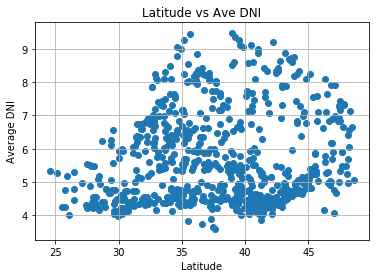

In [16]:
plt.scatter(combined_data["Lat"], combined_data["Ave DNI"])
plt.title('Latitude vs Ave DNI')
plt.xlabel('Latitude')
plt.ylabel('Average DNI')
plt.grid()
# plt.savefig('../output_data/Lat_vs_Ave_DNI.png')

## Latitude vs. Ave GHI Plot

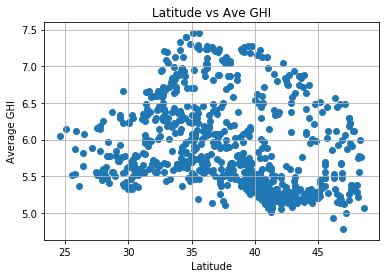

In [17]:
plt.scatter(combined_data["Lat"], combined_data["Ave GHI"])
plt.title('Latitude vs Ave GHI')
plt.xlabel('Latitude')
plt.ylabel('Average GHI')
plt.grid()

## Latitude vs. Ave Lat Tilt Plot

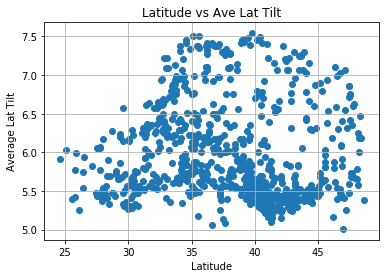

In [18]:
plt.scatter(combined_data["Lat"], combined_data["Ave Lat Tilt"])
plt.title('Latitude vs Ave Lat Tilt')
plt.xlabel('Latitude')
plt.ylabel('Average Lat Tilt')
plt.grid()

## Linear Regression

In [37]:
# OPTIONAL: Create a function to create Linear Regression plots
# plot_data=combined_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# xvalue=['Ave GHI']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Northern Latitudes vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()



In [20]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# south=weather_data.loc[(weather_data['Lat']<=0)]
# xvalue=south['Lat']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=south[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Southern Latitudea vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()

In [21]:
# # Create Northern and Southern Hemisphere DataFrames
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvaluen=north['Lat']
# south=weather_data.loc[(weather_data['Lat']<0)]
# xvalues=south['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [36]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvalue=north['Lat']

# xvalue=combined_data['Ave GHI']   
# yvalue=combined_data['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
# regress_values = xvalue * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalue,yvalue)
# plt.plot(xvalue,regress_values,"r-")
# plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Northern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.show()

# print('For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
# yvalue=south['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Southern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Max_Temp.png')
# plt.show()

# print('As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
# yvalue=north['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Northern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
# yvalue=south['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Southern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
# yvalue=north['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Northern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Cloudiness.png')
# plt.show()

# print('There is a slight decress in Cloudiness as you move North')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
# yvalue=south['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Southern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Cloudiness.png')
# plt.show()

# print('Slight incress in % Cloudiness as you move towards the equator')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
# yvalue=north['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Northern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [29]:
# yvalue=south['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Southern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')
